# Artificial Intelligence Course - Fall 1402
## Kasra Hajiheidari 810199400
## Computer Assignment #2 - Reinforcement Learning

# Table of Contents

- [Part 1: Value Iteration & Policy Iteration Algorithms](#1)
    - [َQuestion 1:](#1-0)
    - [َQuestion 2:](#1-1)
    - [َQuestion 3:](#1-12)
    - [َQuestion 4:](#1-2)
    - [َQuestion 5:](#1-3)
        - [Value Iteration](#1-3-1)
        - [Policy Iteration](#1-3-2)
    - [َQuestion 6:](#1-4)
        - [Value Iteration](#1-4-1)
        - [Policy Iteration](#1-4-2)
- [Part 2: Q-Learning Algorithm](#2)
    - [َQuestion 8:](#2-1)
    - [َQuestion 9:](#2-2)
    - [َQuestion 10:](#2-3)

In [1]:
# import
import numpy as np
import gym

<a name='1'></a>
## Part 1: Value Iteration & Policy Iteration Algorithms

In [2]:
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
env = gym.make('FrozenLake-v1',render_mode="human", desc=None, map_name="4x4", is_slippery=False)
env.metadata

{'render_modes': ['human', 'ansi', 'rgb_array'], 'render_fps': 4}

<a name='1-0'></a>
### Question 1:

Value Iteration:
The main goal is to find the optimal value function for a Markov Decision Process.
To achive this goal we initialize the value function arbitrarily. Then we iteratively update the value of each state by considering the maximum expected cumulative reward achievable from that state and we repeat until convergence. After convergence we extract the optimal policy from the converged values.
So we can say the main idea is to evaluate and improve the value function iteratively.

<a name='1-1'></a>
### Question 2:

In [3]:
mapper = {0:"←" , 1:"↓" , 2:"→" , 3:"↑"}
class ValueIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.zeros((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.zeros((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))


    def value_estimation(self):
        # self.delta = np.inf
        i = 0
        while(i < 100):
            i+=1
            # self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                for action in range(self.env.action_space.n):
                    action_value = 0
                    for probability, next_state, reward, done in self.env.P[state][action]:
                        ### START CODE HERE ###
                        if(done):
                          action_value += probability*reward
                        else:
                          action_value += probability*(reward + self.discount_factor*self.state_values[next_state])
                        ### END CODE HERE ###
                    self.q_values[state, action] = action_value

                self.state_values[state] = np.max(self.q_values[state,:])

                # self.delta = np.max([self.delta, abs(v - self.state_values[state])])

    def take_action(self, action):
        next_state, reward, done, truc, info = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return np.argmax(self.q_values[state,:])

    def optimal_policy(self):
        policy = [[],[],[],[]]
        for i in range(4):
          for j in range(4):
            policy[i].append(self.get_optimal_policy(i*4 +j))
        return policy

    def print_state_values(self):
        for i in range(4):
          print(str([format(float(value), ".4F") for value in self.state_values[i*4:i*4+4]]))

    def print_q_state_values(self):
        for i in range(16):
          print(str([format(float(value), ".4F") for value in self.q_values[i]]))

    def print_optimal_policy(self):
        policy = [[],[],[],[]]
        op = self.optimal_policy()
        for i in range(4):
          for j in range(4):
            policy[i].append(mapper[op[i][j]])
          print(policy[i])

    def show_optimal_play(self):
        env.reset()
        state = 0;
        done = False
        while (not done):
        #   frame = env.render()
        #   clear_output()
        #   plt.imshow(np.squeeze(frame))
        #   plt.axis("off")
        #   plt.show()
          time.sleep(1)
          state,reward,done = self.take_action(self.get_optimal_policy(state))
        self.env.close()

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-12'></a>
### Question 3:

Policy Iteration:
The main goal is to find the optimal policy for a Markov Decision Process.
To achive that we initialize a random policy arbitrarily. Then iteratively evaluate the policy (compute the value function for the policy) that is called policy-evaluation. Then we improve the policy by selecting actions that maximize expected cumulative reward that is called policy-improvement. We have to repeat this two steps until convergence.
The main idea is to alternate between policy evaluation and policy improvement until an optimal policy is found.

<a name='1-2'></a>
### Question 4:

In [4]:
class PolicyIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.zeros((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.zeros((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.policy = np.random.randint(self.env.action_space.n, size=self.env.observation_space.n) # initial policy
        self.policy_stable = False

    def policy_evaluation(self):
        self.delta = np.inf
        i = 0
        while(i < 100):
            i+=1
            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                new_state_value = 0
                for probability, next_state, reward, done in self.env.P[state][self.policy[state]]:
                    ### START CODE HERE ###
                    if(done):
                      new_state_value += probability*reward
                    else:
                      new_state_value += probability*(reward + self.discount_factor*self.state_values[next_state])
                    ### END CODE HERE ###
                self.state_values[state] = new_state_value

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

    def policy_improvement(self):
        self.policy_stable = True

        for state in range(self.env.observation_space.n):
            old_policy = self.policy[state]

            for action in range(self.env.action_space.n):

                action_value = 0
                for probability, next_state, reward, done in self.env.P[state][action]:
                    ### START CODE HERE ###
                    if(done):
                      action_value += probability*reward
                    else:
                      action_value += probability*(reward + self.discount_factor*self.state_values[next_state])
                    ### END CODE HERE ###
                self.q_values[state, action] = action_value

            self.policy[state] = np.argmax(self.q_values[state,:])

            if old_policy != self.policy[state]:
                self.policy_stable = False

    def policy_estimation(self):
        self.policy_stable = False
        j = 0
        while not self.policy_stable:
            j+=1
            # print(j)
            self.policy_evaluation()
            self.policy_improvement()

    def take_action(self, action):
        next_state, reward, done, trunc, info = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return self.policy[state]

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

    def optimal_policy(self):
        policy = [[],[],[],[]]
        for i in range(4):
          for j in range(4):
            policy[i].append(self.get_optimal_policy(i*4 +j))
        return policy

    def print_state_values(self):
        for i in range(4):
          print(str([format(float(value), ".4F") for value in self.state_values[i*4:i*4+4]]))

    def print_q_state_values(self):
        for i in range(16):
          print(str([format(float(value), ".4F") for value in self.q_values[i]]))

    def print_optimal_policy(self):
        policy = [[],[],[],[]]
        op = self.optimal_policy()
        for i in range(4):
          for j in range(4):
            policy[i].append(mapper[op[i][j]])
          print(policy[i])

    def show_optimal_play(self):
        env.reset()
        state = 0;
        done = False
        while (not done):
        #   frame = env.render()
        #   clear_output()
        #   plt.imshow(np.squeeze(frame))
        #   plt.axis("off")
        #   plt.show()
          time.sleep(1)
          state,reward,done = self.take_action(self.get_optimal_policy(state))
        self.env.close()

<a name='1-3'></a>
### Question 5:

<a name='1-3-1'></a>
#### Value Iteration:

In [5]:
val_iteration = ValueIteration(env,0.9)
val_iteration.reset()
val_iteration.value_estimation()
print("state values:")
val_iteration.print_state_values()
print("q_state values:")
val_iteration.print_q_state_values()
print("optimal poliacy:")
val_iteration.print_optimal_policy()

state values:
['0.5905', '0.6561', '0.7290', '0.6561']
['0.6561', '0.0000', '0.8100', '0.0000']
['0.7290', '0.8100', '0.9000', '0.0000']
['0.0000', '0.9000', '1.0000', '0.0000']
q_state values:
['0.5314', '0.5905', '0.5905', '0.5314']
['0.5314', '0.0000', '0.6561', '0.5905']
['0.5905', '0.7290', '0.5905', '0.6561']
['0.6561', '0.0000', '0.5905', '0.5905']
['0.5905', '0.6561', '0.0000', '0.5314']
['0.0000', '0.0000', '0.0000', '0.0000']
['0.0000', '0.8100', '0.0000', '0.6561']
['0.0000', '0.0000', '0.0000', '0.0000']
['0.6561', '0.0000', '0.7290', '0.5905']
['0.6561', '0.8100', '0.8100', '0.0000']
['0.7290', '0.9000', '0.0000', '0.7290']
['0.0000', '0.0000', '0.0000', '0.0000']
['0.0000', '0.0000', '0.0000', '0.0000']
['0.0000', '0.8100', '0.9000', '0.7290']
['0.8100', '0.9000', '1.0000', '0.8100']
['0.0000', '0.0000', '0.0000', '0.0000']
optimal poliacy:
['↓', '→', '↓', '←']
['↓', '←', '↓', '←']
['→', '↓', '↓', '←']
['←', '→', '→', '←']


In [6]:
val_iteration.show_optimal_play()

c:\Users\Mr. Hajiheideri\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


<a name='1-3-2'></a>
#### Policy Iteration:

In [7]:
env = gym.make('FrozenLake-v1',render_mode="human", desc=None, map_name="4x4", is_slippery=False)

In [8]:
pol_iteration = PolicyIteration(env,0.9)
pol_iteration.reset()
pol_iteration.policy_estimation()
print("state values:")
pol_iteration.print_state_values()
print("q_state values:")
pol_iteration.print_q_state_values()
print("optimal poliacy:")
pol_iteration.print_optimal_policy()

state values:
['0.5905', '0.6561', '0.7290', '0.6561']
['0.6561', '0.0000', '0.8100', '0.0000']
['0.7290', '0.8100', '0.9000', '0.0000']
['0.0000', '0.9000', '1.0000', '0.0000']
q_state values:
['0.5314', '0.5905', '0.5905', '0.5314']
['0.5314', '0.0000', '0.6561', '0.5905']
['0.5905', '0.7290', '0.5905', '0.6561']
['0.6561', '0.0000', '0.5905', '0.5905']
['0.5905', '0.6561', '0.0000', '0.5314']
['0.0000', '0.0000', '0.0000', '0.0000']
['0.0000', '0.8100', '0.0000', '0.6561']
['0.0000', '0.0000', '0.0000', '0.0000']
['0.6561', '0.0000', '0.7290', '0.5905']
['0.6561', '0.8100', '0.8100', '0.0000']
['0.7290', '0.9000', '0.0000', '0.7290']
['0.0000', '0.0000', '0.0000', '0.0000']
['0.0000', '0.0000', '0.0000', '0.0000']
['0.0000', '0.8100', '0.9000', '0.7290']
['0.8100', '0.9000', '1.0000', '0.8100']
['0.0000', '0.0000', '0.0000', '0.0000']
optimal poliacy:
['↓', '→', '↓', '←']
['↓', '←', '↓', '←']
['→', '↓', '↓', '←']
['←', '→', '→', '←']


In [9]:
pol_iteration.show_optimal_play()

<a name='1-4'></a>
### Question 6:

<a name='1-4-1'></a>
#### Value Iteration:

In [10]:
env = gym.make('FrozenLake-v1',render_mode="ansi", desc=None, map_name="4x4", is_slippery=False)
estimation_time = 0
for i in range(40): 
    val_iteration = ValueIteration(env,0.9)
    val_iteration.reset()
    start = time.perf_counter()
    val_iteration.value_estimation() 
    end = time.perf_counter()
    estimation_time += end - start
print("average value estimation time = " + str(estimation_time / 40))


average value estimation time = 0.043551177500194174


<a name='1-4-2'></a>
#### Policy Iteration:

In [11]:
env = gym.make('FrozenLake-v1',render_mode="ansi", desc=None, map_name="4x4", is_slippery=False)
estimation_time = 0
for i in range(40): 
    pol_iteration = PolicyIteration(env,0.9)
    pol_iteration.reset()
    start = time.perf_counter()
    pol_iteration.policy_estimation() 
    end = time.perf_counter()
    estimation_time += end - start
print("average policy estimation time = " + str(estimation_time / 40))

average policy estimation time = 0.17455808250088012


As shown above,we calculate the total time of convergence for both algorithm for 40 iterations.The obtained values ​​are very close to each other, but the main point is that if the policy gets fixed quickly,the policy iteration algorithm is better because it only evaluates values after the policy gets fixed and not policy improvement, but in the other side value iteration does both in every iterations so in that case policy iteration can be better. 

### Question 7:
Q-learning is a method that learns from interacting with the environment, making it suitable for situations where the MDP model is unknown or hard to obtain.
The main goal is to learn an optimal action-value function without knowing the complete MDP model.
To achive that, at first we have to initialize Q-values arbitrarily for all state-action pairs.Then we interact with the environment: Choose actions based on exploration (epsilon-greedy) or based on best Q-values, observe rewards, and update Q-values using the Bellman equation and repeat that for a sufficient number of episodes.
After converging of the algorithm,we extract the policy from the learned Q-values (by choosing the action with the highest Q-value for each state).
In the end the main idea is to learn the optimal action-values through exploration and exploitation, allowing the agent to make informed decisions without explicitly knowing the transition probabilities.

<a name='2'></a>
## Part 2: Q-Learning Algorithm

In [12]:
# hyperparameters
REPS = 20
EPISODES = 2000
EPSILON = 0.1
LEARNING_RATE = 0.1
DISCOUNT = 0.9
STUDENT_NUM = 400

<a name='2-1'></a>
### Question 8:

In [13]:
import random
class QLearningAgent():
    def __init__(self, env, epsilon, learning_rate, discount_factor, seed):
      self.env = env
      self.epsilon = epsilon
      self.learning_rate = learning_rate
      self.olr = learning_rate
      self.discount_factor = discount_factor
      self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
      self.seed = seed
      self.epsilon_min = 0.0
      self.delta = (self.epsilon - self.epsilon_min) / 100

    def choose_action(self, state):
      ### START CODE HERE ###
      # With probability epsilon, choose a random action
      if random.random() <= self.epsilon: 
        action = self.env.action_space.sample()
      else:
        action = np.argmax(self.q_table[state,:])
      # Otherwise, choose the action with the highest Q-value
      # ### END CODE HERE ###
      return action

    def update_q_table(self, state, action, nextState, reward):
      ### START CODE HERE ###
      # Calculate the new Q-value using the Q-learning formula
      # print("last value",self.q_table[state][action])
      self.q_table[state][action] = (1 - self.learning_rate)*self.q_table[state][action] \
      + self.learning_rate*(reward + self.discount_factor*np.max(self.q_table[nextState,:]))
      # print("new value",self.q_table[state][action])
      ### END CODE HERE ###

    def decay_epsilon(self):
      ### START CODE HERE ###
      self.epsilon = self.epsilon - self.delta
      ### END CODE HERE ###

    def decrease_learning_rate(self):
      ### START CODE HERE ###
      self.learning_rate = self.learning_rate * 0.98
      ### END CODE HERE ###

    def take_action(self, action):
      next_state, reward, done, _ = self.env.step(action)
      return next_state, reward, done

    def get_optimal_policy(self, state):
      return np.argmax(self.q_table[state])
    

    def get_q_values(self):
      return self.q_table

    def reset(self):
      self.learning_rate = self.olr
      return self.env.reset(seed=self.seed)
    
    def optimal_policy(self,state):
      policy = []
      for i in range(5):
        for j in range(5):
          policy[i].append(self.get_optimal_policy(i*5 +j))
      return policy

<a name='2-2'></a>
### Question 9:

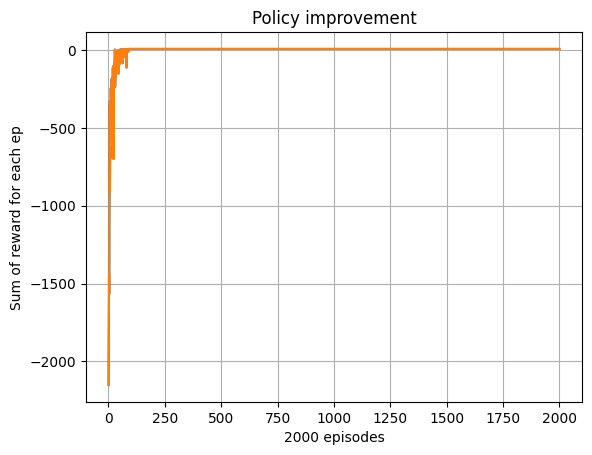

In [14]:
env = gym.make('Taxi-v3',render_mode="ansi")
env.reset(seed = STUDENT_NUM)
x_fixed = np.array([x for x in range(1, REPS+1)])
y_fixed = np.array([])
x_reward_fixed = np.array([x for x in range(1, EPISODES+1)])
y_reward_fixed = np.array([])


for rep in range(REPS):
    agent = QLearningAgent(env,EPSILON,LEARNING_RATE,DISCOUNT,STUDENT_NUM)
    start = time.perf_counter_ns()
    for episode in range(EPISODES):
        Initial_state, _= agent.reset()
        sum_rew = 0
        while(True):
            action = agent.choose_action(Initial_state)
            next_state,rew,done,trunc,info = agent.env.step(action)
            agent.update_q_table(Initial_state,action,next_state,rew)
            Initial_state = next_state
            sum_rew += rew
            if done:
                break
        agent.decay_epsilon()
        if(rep == 0):
            y_reward_fixed = np.append(y_reward_fixed,sum_rew)    
    end = time.perf_counter_ns()
    y_fixed = np.append(y_fixed, (end-start) / (10**9))     
plt.plot(x_reward_fixed, y_reward_fixed)
plt.plot(x_reward_fixed, y_reward_fixed)
plt.xlabel("2000 episodes")
plt.ylabel("Sum of reward for each ep")
plt.title("Policy improvement")
plt.grid()
plt.show()

As shown in the plot,the sum of the rewards in each episode is growing sufficiently and it means we have more accurate values and policy. Also the epsilon is decayed after each episode.There are several ways for epsilon_decay (like exponential or reward-based) and here for simplicity we decay epsilon linearly to the minimum epsilon value.

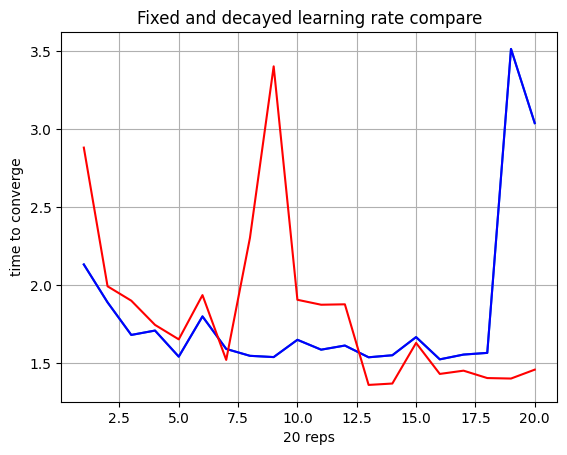

In [15]:
env = gym.make('Taxi-v3',render_mode="ansi")
env.reset(seed = STUDENT_NUM)
x_decay = np.array([x for x in range(1, REPS+1)])
y_decay = np.array([])
for rep in range(REPS):
    agent = QLearningAgent(env,EPSILON,0.2,DISCOUNT,STUDENT_NUM)
    start = time.perf_counter_ns()
    for episode in range(EPISODES):
        Initial_state, _= agent.reset()
        while(True):
            action = agent.choose_action(Initial_state)
            next_state,rew,done,trunc,info = agent.env.step(action)
            agent.update_q_table(Initial_state,action,next_state,rew)
            Initial_state = next_state
            if done:
                break
        agent.decay_epsilon()
        agent.decrease_learning_rate()
    end = time.perf_counter_ns()
    y_decay = np.append(y_decay, (end-start) / (10**9))
plt.plot(x_fixed, y_fixed)
plt.plot(x_fixed, y_fixed, color='blue')
plt.plot(x_decay, y_decay, color='red')
plt.xlabel("20 reps")
plt.ylabel("time to converge")
plt.title("Fixed and decayed learning rate compare")
plt.grid()
plt.show()


As shown in the plot, decreasing the learning rate caused better convergence of the algorithm than the fixed learning rate.
To decay learning rate we start with 0.2 which is two times of fixed learning rate and then decrease it after each episode exponentially.

<a name='2-3'></a>
### Question 10:

In [16]:
env2 = gym.make('Taxi-v3',render_mode="human")
# i = 0  
Initial_state, _= env2.reset(seed = STUDENT_NUM) 
# print(env2.decode(Initial_State)) 
sum = 0   
while(True):
    # print("iteration:", i)
    op_action = agent.get_optimal_policy(Initial_state)
    # print("action",op_action)
    next_state,rew,done,trunc,info = env2.step(op_action)
    sum += rew
    time.sleep(1)
    # print("current state",Initial_state,"next_state:",next_state," reward:",rew," done:",done)
    Initial_state = next_state
    # i+=1
    if done:
        break
print("Maximum reward in optimal policy:",sum)
env2.close()

Maximum reward in optimal policy: 7
